## A.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

riketAk9_path = "..\project\data\\riket2023_åk9_np.xlsx"

df_riketAk9 = pd.read_excel(riketAk9_path, skiprows=8)
df_riketAk9.head()

,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
0,Riket,Samtliga,106941,51864,55077,97.0,97.1,97.0,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17.0,16.8
3,Riket,Skolverket,49,24,25,100.0,100.0,100.0,18.5,18.9,18.2


## B.

In [61]:
def reader(sheet, path):
    df = pd.read_excel(path, sheet_name=sheet, skiprows= 8)
    df.columns = ['Plats', 'Huvudman', 'Totalt (A-F)', 'Flickor (A-F)', 'Pojkar (A-F)',
                  'Totalt (A-E)%', 'Flickor (A-E)%', 'Pojkar (A-E)%',
                  'Totalt (poäng)', 'Flickor (poäng)', 'Pojkar (poäng)']
    
    return df

df_math = reader("Matematik", riketAk9_path)
print("Matematik:")

df_math.head()

Matematik:


,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E)%,Flickor (A-E)%,Pojkar (A-E)%,Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [62]:

df_math["Totalt (A-E)%"] = pd.to_numeric(df_math["Totalt (A-E)%"], errors='coerce')
df_math["Pojkar (A-E)%"] = pd.to_numeric(df_math["Pojkar (A-E)%"], errors='coerce')
df_math["Flickor (A-E)%"] = pd.to_numeric(df_math["Flickor (A-E)%"], errors='coerce')


df_math["Totalt (F)"] = df_math["Totalt (A-F)"] - (df_math["Totalt (A-F)"] * df_math["Totalt (A-E)%"] / 100)
df_math["Pojkar (F)"] = df_math["Pojkar (A-F)"] - (df_math["Pojkar (A-F)"] * df_math["Pojkar (A-E)%"] / 100)
df_math["Flickor (F)"] = df_math["Flickor (A-F)"] - (df_math["Flickor (A-F)"] * df_math["Flickor (A-E)%"] / 100)

print("Totalt antal studenter med F: ", df_math["Totalt (F)"].sum().round())
print("Totalt antal flickor med F: ", df_math["Flickor (F)"].sum().round())
print("Total antal pojkar med F: ", df_math["Pojkar (F)"].sum().round())



Totalt antal studenter med F:  23254.0
Totalt antal flickor med F:  11661.0
Total antal pojkar med F:  11574.0


## C.

Text(0, 1, 'POÄNG')

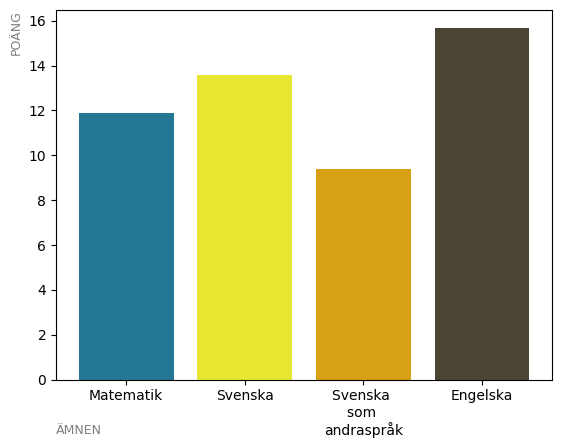

In [63]:

df_swedish = reader("Svenska", riketAk9_path)
df_swedish_2 = reader("Svenska som andraspråk", riketAk9_path)
df_english = reader("Engelska", riketAk9_path)


total_points = [
    df_math.loc[0, "Totalt (poäng)"],
    df_swedish.loc[0, "Totalt (poäng)"],
    df_swedish_2.loc[0, "Totalt (poäng)"],
    df_english.loc[0, "Totalt (poäng)"]
]
t = [1,2,3,4]
subjects = [
    "Matematik",
    "Svenska",
    "Svenska \nsom \nandraspråk",
    "Engelska"
]

fig, ax = plt.subplots()


plt.bar(subjects, total_points, color = ["#247895", "#E7E732", "#D8A014", "#494434"])
plt.xlabel("ÄMNEN", loc="left", labelpad=-10, color="gray", fontsize=9)
plt.ylabel("POÄNG", loc="top", color="gray", fontsize=9)
 

## D.

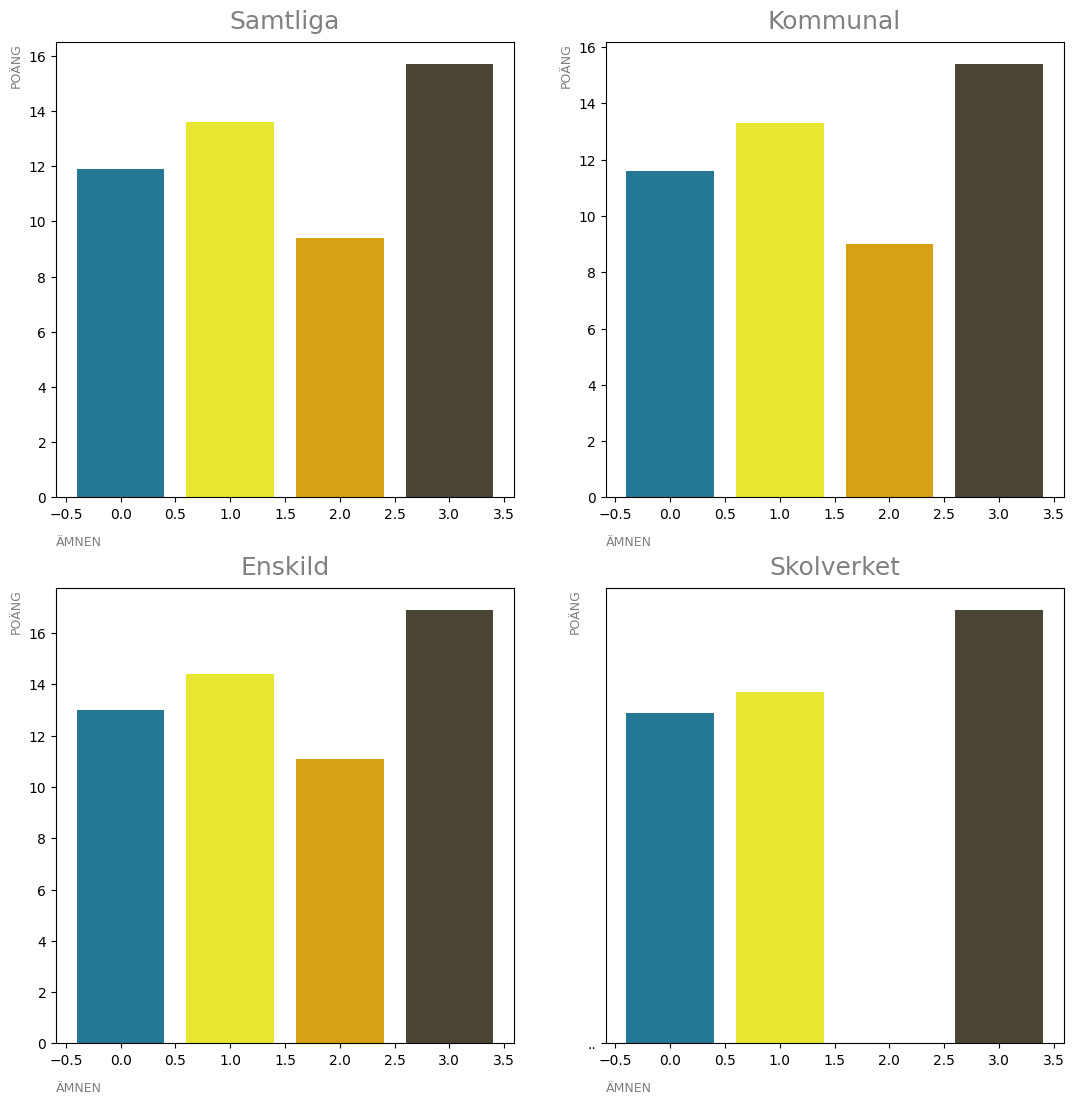

In [76]:
def plot(dataframes, principals, subjects):
    
    graph_dim = int((len(principals)**0.5))
    bar_amount = len(subjects)
    fig, axes = plt.subplots(graph_dim, graph_dim, figsize = (13, 13))
    axes = axes.flatten()
    colors = ["#247895", "#E7E732", "#D8A014", "#494434"]
    for ax, principal in zip(axes, principals):
        points = [df.loc[df['Huvudman'] == principal, 'Totalt (poäng)'].values[0] if principal in df['Huvudman'].values else np.nan for df in dataframes]
        available_points = [p for p in points]
        available_subjects = [subjects[i] for i, p in enumerate(points)]
        

        bar_positions = np.arange(len(available_subjects))

        
        for i, point in enumerate(available_points):
            subject_color = colors[i]
            ax.bar(bar_positions[i], point, color=subject_color, align='center')
            
            
        ax.set_xlabel("ÄMNEN", loc="left", labelpad=10, color="gray", fontsize=9)
        ax.set_ylabel("POÄNG", loc="top", color="gray", fontsize=9)
        ax.set_title(principal, pad=10, color="gray", fontsize=18)
        
        

dataframes = [
    df_math,
    df_swedish,
    df_swedish_2,
    df_english
]
principals = [
    "Samtliga",
    "Kommunal",
    "Enskild",
    "Skolverket"
]


plot(dataframes, principals, subjects)